In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import seaborn as sns #importing our visualization library
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
 df.isnull().sum() #checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           1
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

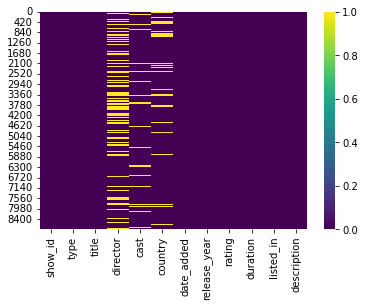

In [ ]:
sns.heatmap(df.isnull(),cmap = 'viridis')

We have null values in  director, cast,country,date_added and rating.So lets deal with it.

In [ ]:
df['rating'].value_counts().unique()

array([3210, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3])

In the above data, we can choose to drop the director and cast columns completely as they are not a huge part for us while we visualize the data and they dont add any significant value to our analysis. We are only focused on visualizing this data hence dropping two columns wont be any trouble for us.But this should not be a regular practise as if we are making a recommender system, we cannot drop the director and cast of a movie as these are a key feature used to recommend movies to users

In [ ]:
df.drop(['director','cast'],axis = 1,inplace = True)

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.

In [ ]:
df['country'].replace(np.nan, 'United States',inplace  = True)

In [ ]:
df.drop(['date_added'],axis =1,inplace = True)

We already have released year for each movie and hence even if we dont have released date,it wont affect our analysis much. Hence we can Drop released date column.

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['rating'].value_counts()

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

As we can see we only have 10 missing values in our rating column, we can either drop them or replace them. We have TV-MA which is the most common raing and hence we can replace all these nan values with TV-MA.

In [ ]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        1
listed_in       0
description     0
dtype: int64

We have now dealt with all of our missing data so lets  get started with our data visualization

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:xlabel='type', ylabel='count'>

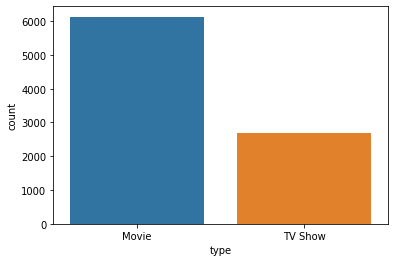

In [ ]:
sns.countplot(x='type',data = df) #looking at number of Movies and TV shows

Here we can see that there are more movies(4000+) in Netflix than TV Shows(~2500)

<AxesSubplot:xlabel='rating', ylabel='count'>

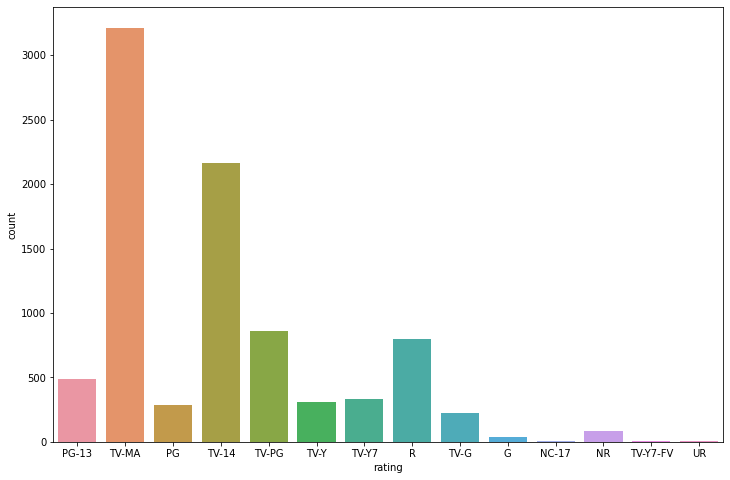

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

Here we can see that most of the movies and tv shows in netflix have the rating 'TV-MA' following by the rating 'TV-14'. There are least number of 'NC-17' rated movies and TV shows.

<AxesSubplot:xlabel='release_year', ylabel='count'>

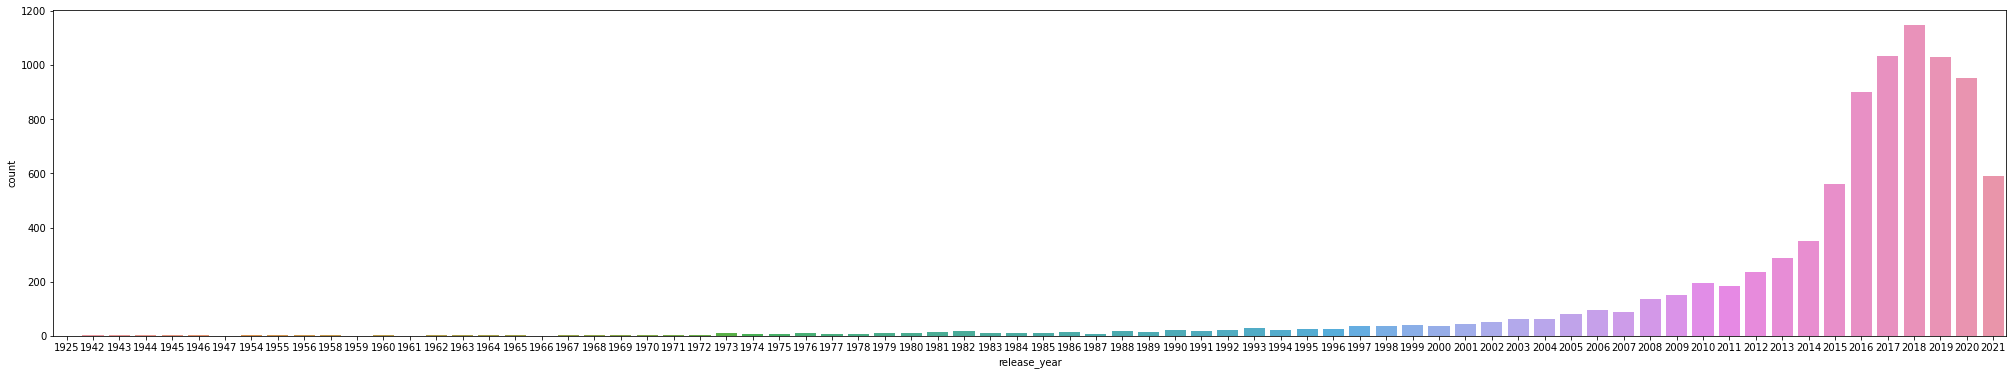

In [ ]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

As we can see most of the Movies and Tv shows on Netflix are Released in the past decade and very few were released earlier

<AxesSubplot:xlabel='rating', ylabel='type'>

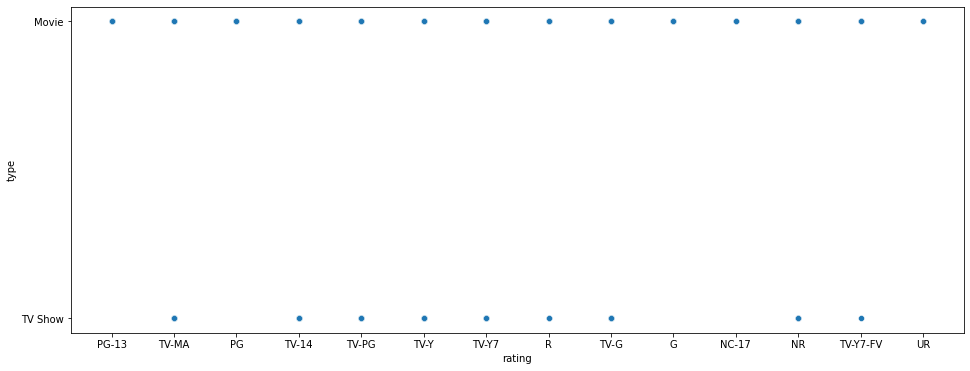

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df) #analysing the type, whether its a movie or a movie v/s the rating it has

<AxesSubplot:xlabel='rating', ylabel='count'>

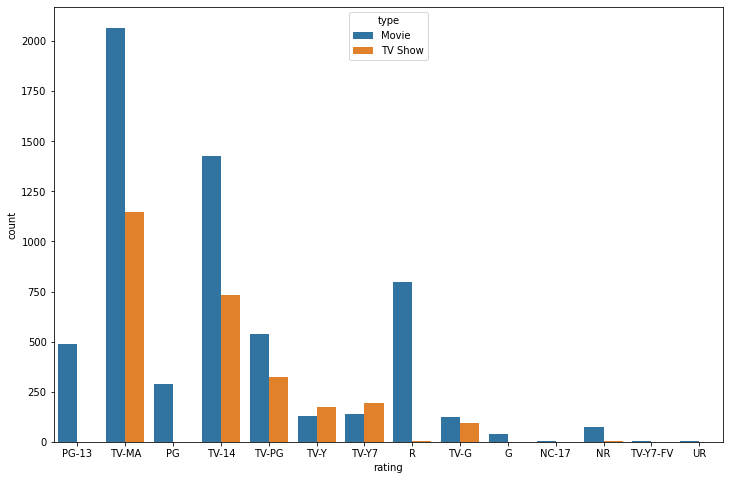

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

In [ ]:
import plotly.express as px #distribution according to countries
top_rated=df[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


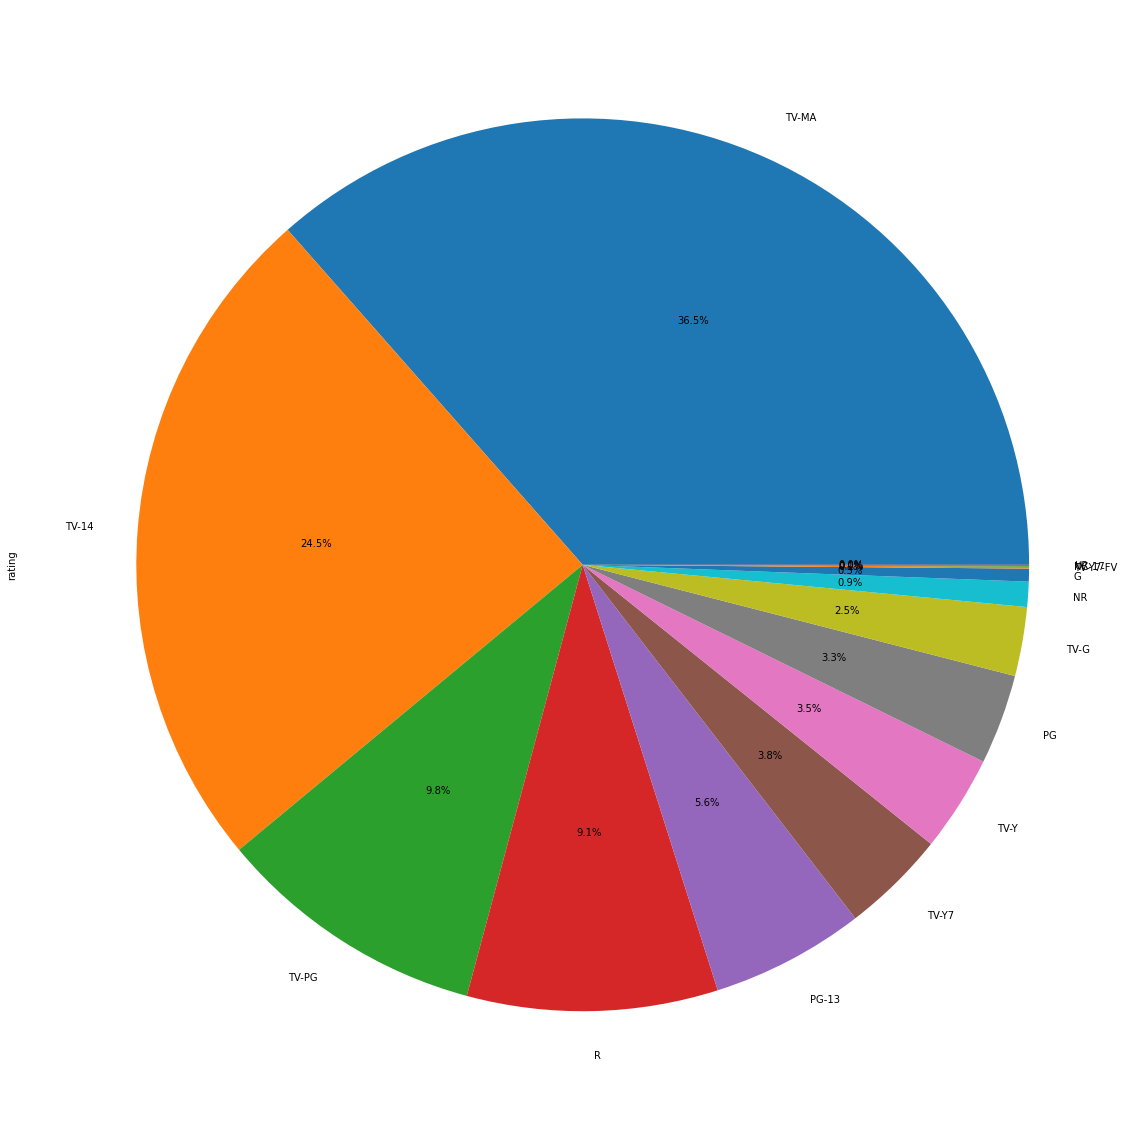

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) #distribution according to the rating
plt.show()

In [ ]:
country_counter=df['country'].value_counts().sort_values(ascending=False) #countries with the most rated content
country_counter=pd.DataFrame(country_counter)
topcountry=country_counter[0:11]
topcountry

,country
United States,3649
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110
Egypt,106


In [ ]:
old = df.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [ ]:
tag = "Stand-Up Comedy" #standup shows on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
359,The Original Kings of Comedy,United States,2000
388,Plastic Cup Boyz: Laughing My Mask Off!,United States,2021
400,Revelations: The Masters of the Universe: Reve...,United States,2021
475,The Stand-Up,United States,2019
484,Lee Su-geun: The Sense Coach,United States,2021
511,Chelsea,United States,2017
826,Bo Burnham: Inside,United States,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1249,Blanche Gardin: The All-Nighter,United States,2021


In [ ]:
tag = "Kids' TV" #Kids TV shows on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
34,Tayo and Little Wizards,United States,2020
40,He-Man and the Masters of the Universe,United States,2021
67,Saved by the Bell,United States,1994
85,Pokémon Master Journeys: The Series,United States,2021
87,Titipo Titipo,United States,2019
89,Mighty Raju,United States,2017
97,Kid Cosmic,United States,2021
100,Tobot Galaxy Detectives,United States,2019
106,Bunk'd,United States,2021
123,Luv Kushh,United States,2012


In [ ]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [ ]:
fig = px.choropleth(   #distribution of content on basis of countries
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"]
)
fig.show()

In [ ]:
date = pd.DataFrame(df.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

,Year,Count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

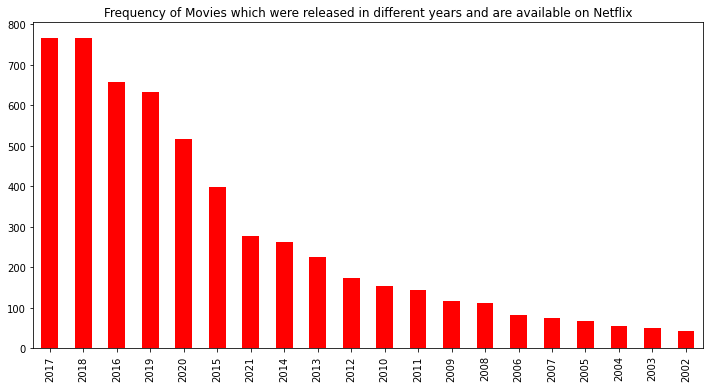

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

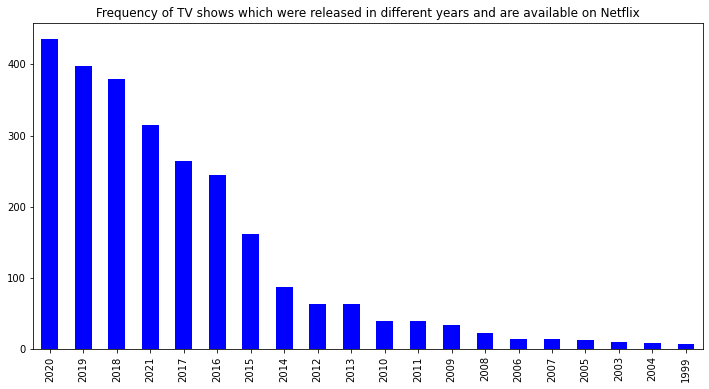

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

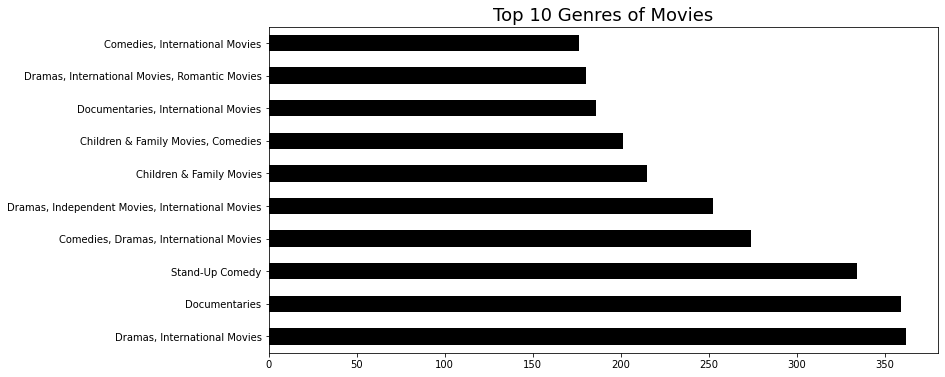

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

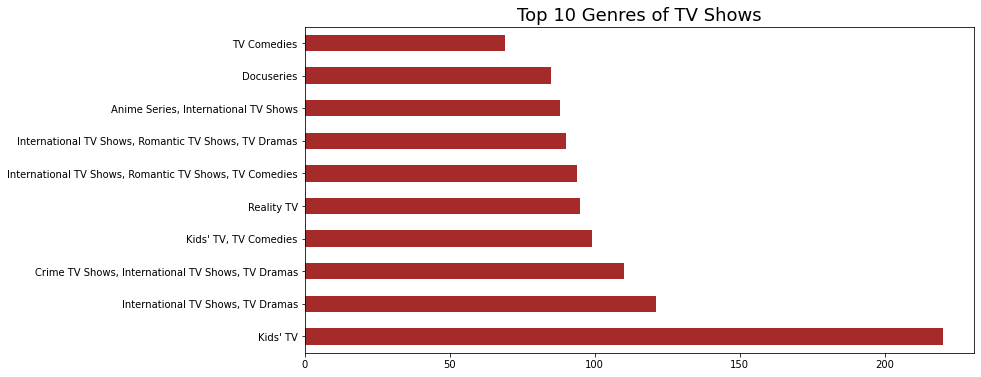

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

In [ ]:
from wordcloud import WordCloud

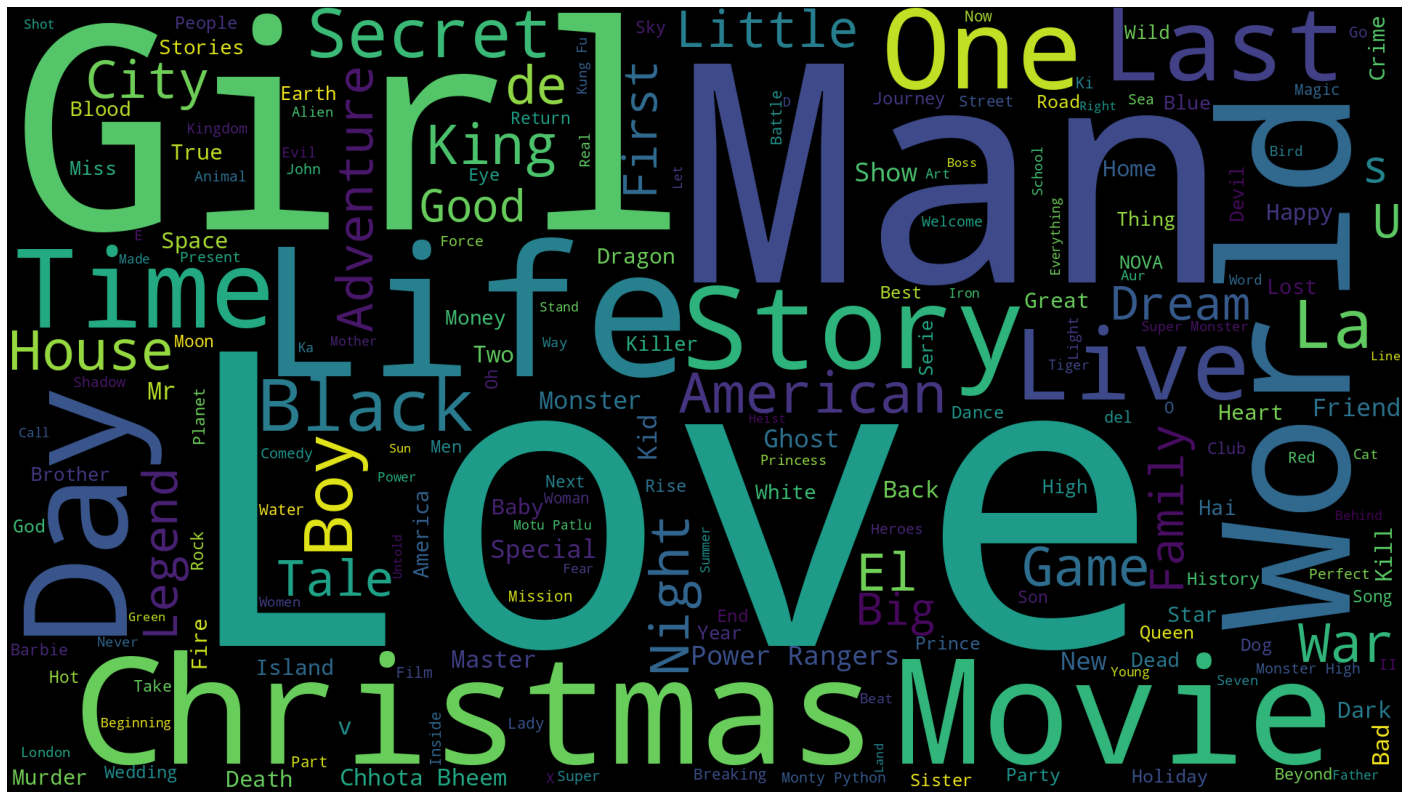

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()